In [61]:
import bs4
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Load datasets

Challenge URL: https://hackerspace.govhack.org/challenges/re_energising_our_city_centre_during_the_covid_19_pandemic

The dataset provided in this challenge includes job keeper data for all post codes in Australia. I will first start by looking at what this dataset looks like.

In [31]:
df = pd.read_excel('Datasets/JobKeeper-data-20200731.xlsx', skiprows=1)

In [32]:
df.head(20)

,Postcode,April Application Count,May Application Count
0,0800,413,429
1,0801,15,15
2,0810,773,787
3,0812,316,325
4,0820,740,754
5,0821,11,11
6,0822,184,197
7,0828,141,148
8,0829,43,44
9,0830,304,303


In [33]:
df.dtypes

Postcode                   object
April Application Count     int64
May Application Count       int64
dtype: object

This dataset shows the number of jobseeker applications have been made by post codes in April and May

In [34]:
df.describe()

,April Application Count,May Application Count
count,2540.000000,2540.000000
mean,677.550394,713.766929
std,17075.393074,17987.958663
min,5.000000,5.000000
25%,25.000000,27.000000
50%,117.000000,125.000000
75%,480.000000,504.000000
max,860489.000000,906484.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Postcode                 2540 non-null   object
 1   April Application Count  2540 non-null   int64 
 2   May Application Count    2540 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 59.7+ KB


## Add postcode data
I want to focus on the jobkeeper figures just for the Liverpool city council, I found a list of postcode in the Liverpool council area here - https://www.swslhd.health.nsw.gov.au/planning/content/pdf/LGA%20Suburb%20-%20Postcode%20list/SP%20Liverpool.pdf.

In [46]:
lga_postcodes = pd.read_csv("Datasets/SP Liverpool.csv")

In [82]:
lga_postcodes.count()

Suburbs      59
Postcodes    59
dtype: int64

In [50]:
lga_postcodes.head(5)

,Suburbs,Postcodes
0,Anzac Village,2173
1,Ashcroft,2168
2,Austral,2179
3,Badgerys Creek (crosses Penrith Council),2555
4,Bringelly (crosses Camden Council),2556


### Merge the two datasets

In [164]:
lga_jobkeeper = df[df['Postcode'].isin(lga_postcodes.Postcodes.values)].reset_index().drop('index', axis=1)

In [165]:
lga_jobkeeper

,Postcode,April Application Count,May Application Count
0,2168,950,973
1,2170,4061,4172
2,2171,1137,1171
3,2172,87,93
4,2173,290,295
5,2174,224,233
6,2178,235,250
7,2179,359,379
8,2555,14,15
9,2556,156,164


In [166]:
lga_jobkeeper.sort_values('May Application Count', ascending=False, inplace=True)

<AxesSubplot:xlabel='Postcode'>

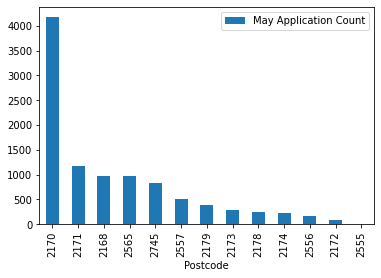

In [167]:
lga_jobkeeper.plot(kind='bar', x='Postcode', y='May Application Count')

Based on this it's clear that the 2170 post code has been the worst affected are,  this could be due to the density of housing in that area as there is a higher concentration of high density dwellings in and around the Liverpool CBD

LGA code for Liverpool is 14900

https://itt.abs.gov.au/itt/r.jsp?RegionSummary&region=14900&dataset=ABS_REGIONAL_LGA2019&geoconcept=LGA_2019&maplayerid=LGA2018&measure=MEASURE&datasetASGS=ABS_REGIONAL_ASGS2016&datasetLGA=ABS_REGIONAL_LGA2019&regionLGA=LGA_2019&regionASGS=ASGS_2016

## Location data
Let's get some location data for those post codes

In [62]:
loc_data_url = "https://www.matthewproctor.com/full_australian_postcodes_nsw"
loc_raw_data = requests.get(loc_data_url).text

In [65]:
soup = bs4.BeautifulSoup(loc_raw_data, 'html.parser')

In [71]:
table = soup.find("table", {"class": "table table-striped"})

In [75]:
import csv

output = []
for row in table.find_all('tr'):
    columns = row.find_all('td')
    
    output_row = []
    for col in columns:
        output_row.append(col.text)
    output.append(output_row)

In [77]:
with open('Datasets/loc_data.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerows(output)

In [78]:
loc_df = pd.read_csv("Datasets/loc_data.csv")

In [83]:
loc_df.head(10)

,ID,Postcode,Locality,State,Longitude,Latitude,Category,Type,SA3,SA3 Name,SA4,SA4 Name,Region,Status
0,458,1001,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
1,459,1002,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
2,460,1003,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
3,461,1004,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
4,462,1005,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
5,463,1006,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
6,464,1007,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
7,465,1008,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
8,466,1009,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3
9,467,1010,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,11703.0,Sydney Inner City,117.0,Sydney - City and Inner South,R1,Updated 25-Mar-2020 SA3


In [150]:
liverpool_loc = loc_df[loc_df['Postcode'].isin(lga_jobkeeper.Postcode.values)]

In [227]:
liverpool_loc = liverpool_loc[['Postcode', 'Latitude', 'Longitude']].drop_duplicates(subset=['Postcode'], keep='first')

Since one post code can contain multiple suburbs I will only keep the first set of coordinates, I am only looking for an indicative view on where the most applications are

In [228]:
liverpool_loc = pd.merge(lga_jobkeeper, liverpool_loc, on='Postcode', how='left')

In [229]:
liverpool_loc

,Postcode,April Application Count,May Application Count,Latitude,Longitude
0,2170,4061,4172,-33.928392,150.921448
1,2171,1137,1171,-33.937716,150.848737
2,2168,950,973,-33.915939,150.875345
3,2565,916,970,-33.977234,150.861874
4,2745,784,838,-33.871341,150.671487
5,2557,467,505,-33.993545,150.774858
6,2179,359,379,-33.933109,150.812031
7,2173,290,295,-34.074239,150.919554
8,2178,235,250,-33.874780,150.838225
9,2174,224,233,-33.977497,150.856709


In [230]:
import folium

In [238]:
lga_map = None
lga_map = folium.Map(location=[-33.928392, 150.921448], zoom_start=11.5)

for i, row in liverpool_loc.iterrows():
    if row['May Application Count'] >= 4000:
        marker_color = 'darkred'
        fill_color = 'purple'
    elif row['May Application Count'] >= 1000:
        marker_color = 'darkred'
        fill_color = 'darkred'
    elif row['May Application Count'] >= 800:
        marker_color = 'darkred'
        fill_color = 'red'
    elif row['May Application Count'] >= 600:
        marker_color = 'darkorange'
        fill_color = 'darkorange'
    elif row['May Application Count'] >= 400:
        marker_color = 'darkred'
        fill_color = 'orange'
    elif row['May Application Count'] >= 200:
        marker_color = 'darkred'
        fill_color = 'darkyellow'
    elif row['May Application Count'] < 200:
        marker_color = 'darkyellow'
        fill_color = 'yellow'
    
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        tooltip=folium.Tooltip(f"Postcode: {row['Postcode']}<br>Job Keeper Applications: {row['May Application Count']}"),
        radius=row['May Application Count']*0.45,
        color=marker_color,
        fill=True,
        fill_color=fill_color).add_to(lga_map)

In [244]:
lga_map.height = (50.0, '%')
lga_map.width = (50.0, '%')

In [247]:
lga_map